## Gmarket 베스트 200 상품 데이터 수집
- 상품 데이터 수집
- 상품 이미지 데이터 수집

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
# 1. 웹서비스 분석 : url

In [7]:
url = "http://corners.gmarket.co.kr/Bestsellers"

In [3]:
# 2. request(url) > response : html

In [9]:
response = requests.get(url)

In [4]:
# 3. html(str) > bs, css-selector > DataFrame

In [14]:
# bs 객체 만들기
dom = BeautifulSoup(response.text, "html.parser")

In [47]:
# 상품 리스트 200개 선택하기
elements = dom.select("#gBestWrap > div > div:nth-child(5) > div:nth-child(3) > ul > li")
len(elements)

200

In [48]:
# 각 상품에서 데이터(상품명, 원가, 판매가, 이미지 URL, 상세 페이지 링크) 수집
element = elements[0]
data = {
    "title" : element.select_one(".itemname").text,
    "link" : element.select_one(".itemname").get("href"),
    "img" : element.select_one("img.lazy").get("data-original"),
    "o_price" : element.select_one(".o-price").text,
    "s_price" : element.select_one(".s-price > strong > span > span").text.strip(),
}
data

{'title': '씨투엠에듀 도형학습지 플라토 유치~초등 단계별 선택구매(전4권)',
 'link': 'http://item.gmarket.co.kr/Item?goodscode=962002144&ver=637811369724999790',
 'img': 'http://gdimg.gmarket.co.kr/962002144/still/300?ver=2022022214',
 'o_price': '79,900원',
 's_price': '24,000원'}

In [ ]:
# 데이터 프레임 만들기

In [50]:
datas = []
for element in elements :
    datas.append({
        "title" : element.select_one(".itemname").text,
        "link" : element.select_one(".itemname").get("href"),
        "img" : element.select_one("img.lazy").get("data-original"),
        "o_price" : element.select_one(".o-price").text,
        "s_price" : element.select_one(".s-price > strong > span > span").text,
        })

df = pd.DataFrame(datas)
df

,title,link,img,o_price,s_price
0,씨투엠에듀 도형학습지 플라토 유치~초등 단계별 선택구매(전4권),http://item.gmarket.co.kr/Item?goodscode=96200...,http://gdimg.gmarket.co.kr/962002144/still/300...,"79,900원","24,000원"
1,[길림양행]HBAF 바프 아몬드 5+1봉 마음대로 골라담기,http://item.gmarket.co.kr/Item?goodscode=23544...,http://gdimg.gmarket.co.kr/2354408470/still/30...,"24,750원","16,500원"
2,[필립스]PHILIPS 보풀제거기 GC026/00,http://item.gmarket.co.kr/Item?goodscode=21310...,http://gdimg.gmarket.co.kr/2131039566/still/30...,"25,000원","12,750원"
3,[빙그레]바나나맛 우유 mini 120mlx24팩,http://item.gmarket.co.kr/Item?goodscode=16273...,http://gdimg.gmarket.co.kr/1627367282/still/30...,"22,800원","15,900원"
4,EBS 베스트 자녀교육서 - EBS 당신의 문해력 외 5종 선택구매,http://item.gmarket.co.kr/Item?goodscode=22545...,http://gdimg.gmarket.co.kr/2254568155/still/30...,"20,000원","17,000원"
...,...,...,...,...,...
195,[베베앙(물티슈)]베베앙 아기물티슈 시그니처 대용량 100매 캡형 20팩,http://item.gmarket.co.kr/Item?goodscode=23260...,http://gdimg.gmarket.co.kr/2326019029/still/30...,"39,900원","21,990원"
196,엑소(EXXO) A4 복사용지(A4용지) 75g 2BOX(5000매),http://item.gmarket.co.kr/Item?goodscode=19276...,http://gdimg.gmarket.co.kr/1927664773/still/30...,"33,600원","28,900원"
197,[네스카페]수프리모 오리지널 300T,http://item.gmarket.co.kr/Item?goodscode=16766...,http://gdimg.gmarket.co.kr/1676697261/still/30...,"33,000원","28,900원"
198,[설화수]설화수 순행 클렌징폼 200ml +미니어처 5종증정,http://item.gmarket.co.kr/Item?goodscode=18706...,http://gdimg.gmarket.co.kr/1870699583/still/30...,"39,900원","29,900원"


In [5]:
# 4. download images

In [51]:
!mkdir datas

In [53]:
img = df.loc[0,"img"]
print(img)

http://gdimg.gmarket.co.kr/962002144/still/300?ver=2022022214


In [54]:
response = requests.get(img)

In [56]:
with open('datas/test.png', "wb") as file :
    file.write(response.content)

In [59]:
from PIL import Image as pil

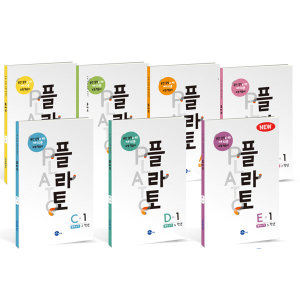

In [60]:
pil.open("datas/test.png")

In [71]:
for idx,data in df[:15].iterrows() :
    filename = "0"*(3-len(str(idx)))+str(idx)
    print(idx, end = " ")
    response = requests.get(data["img"])
    with open(f"datas/{filename}.png", "wb") as file:
        file.write(response.content)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 

In [72]:
%ls datas

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: A0EF-7F3F

 C:\Crawling\datas 디렉터리

2022-02-22  오후 03:28    <DIR>          .
2022-02-22  오후 03:28    <DIR>          ..
2022-02-22  오후 03:29            18,203 000.png
2022-02-22  오후 03:29            52,748 001.png
2022-02-22  오후 03:29            13,640 002.png
2022-02-22  오후 03:29            37,622 003.png
2022-02-22  오후 03:29            54,730 004.png
2022-02-22  오후 03:29            11,991 005.png
2022-02-22  오후 03:29           106,078 006.png
2022-02-22  오후 03:29            23,642 007.png
2022-02-22  오후 03:29            23,430 008.png
2022-02-22  오후 03:29            18,188 009.png
2022-02-22  오후 03:29            37,655 010.png
2022-02-22  오후 03:29            19,435 011.png
2022-02-22  오후 03:29            14,295 012.png
2022-02-22  오후 03:29            14,792 013.png
2022-02-22  오후 03:29            17,907 014.png
2022-02-22  오후 03:04            18,203 test.png
              16개 파일             482,559 바이트
               2개 디렉터리  93,069,840,384 바이트 남음


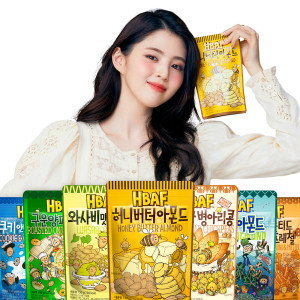

In [76]:
pil.open("datas/001.png")